# Exploratory Data Analysis

With our data now cleaned I can begin to explore the home run data to identify relationships and trends that can help explain what is contributing to a batters home run exit velocity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load the Data

Loading in each of our cleaned datasets:
- StatCast home run pitch data
- Baseball samples from 2015, 2016 and 2017
- Batter personal stats (Height, Weight, Age)

In [2]:
hr_df = pd.read_csv('../data/final_clean_hr.csv')
baseballs_df = pd.read_csv('../data/final_mlb_baseballs.csv')
batters_df = pd.read_csv('../data/final_clean_player_info.csv')

In [3]:
hr_df.drop('Unnamed: 0', axis=1, inplace=True)
baseballs_df.drop('Unnamed: 0', axis=1, inplace=True)
batters_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
hr_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y
0,CH,2017-06-10,84.5,-3.4020,6.4696,Aaron Judge,592450,501957,4.0,R,...,-14.0814,3.8260,1.6672,382.0,121.1,24.626,84.120,1682.0,6.342,54.1561
1,FF,2017-04-28,97.1,-2.8091,5.9279,Aaron Judge,592450,592332,5.0,R,...,-11.0144,3.9900,1.8400,435.0,119.4,16.541,96.019,2335.0,6.043,54.4549
2,CU,2015-06-23,86.7,-1.5647,5.3406,Giancarlo Stanton,519317,593372,7.0,R,...,-33.2860,3.7900,1.7200,479.0,119.2,21.970,84.343,2145.0,5.035,55.4629
3,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,8.0,L,...,-34.1660,3.6318,1.6020,467.0,118.7,22.736,88.690,2173.0,5.433,55.0652
4,SL,2017-06-11,84.7,-1.9795,5.6860,Aaron Judge,592450,548337,5.0,R,...,-24.6262,3.8264,1.6676,495.0,118.6,28.419,84.757,2183.0,6.153,54.3442


In [6]:
baseballs_df.head()

,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds,year
0,5.120125,9.107917,0.040502,0.491333,12740.875,2015
1,5.122500,9.079000,0.038432,0.494100,12926.400,2016
2,5.104863,9.080000,0.038000,0.476463,12926.000,2017


In [5]:
batters_df.head()

,batter_id,height,weight,age
0,592450,79,282,26
1,519317,78,245,28
2,471865,73,220,32
3,443558,74,230,38
4,121347,75,230,43


#### Merge the Dataframes

In order to work with this data together I'll merge the data into one dataframe.

In [7]:
final_df = pd.merge(hr_df, batters_df, how='left', left_on='batter', right_on='batter_id')

In [8]:
final_df[final_df['batter_id'].isnull()]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,batter_id,height,weight,age


In [10]:
final_df = pd.merge(final_df, baseballs_df, how='left', left_on='game_year', right_on='year')

In [11]:
final_df.isnull().sum().sum()

0

In [12]:
final_df.drop_duplicates(inplace=True)

In [14]:
final_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,batter_id,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds,year
0,CH,2017-06-10,84.5,-3.4020,6.4696,Aaron Judge,592450,501957,4.0,R,...,592450,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000,2017
1,FF,2017-04-28,97.1,-2.8091,5.9279,Aaron Judge,592450,592332,5.0,R,...,592450,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000,2017
2,CU,2015-06-23,86.7,-1.5647,5.3406,Giancarlo Stanton,519317,593372,7.0,R,...,519317,78,245,28,5.120125,9.107917,0.040502,0.491333,12740.875,2015
3,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,8.0,L,...,519317,78,245,28,5.104863,9.080000,0.038000,0.476463,12926.000,2017
4,SL,2017-06-11,84.7,-1.9795,5.6860,Aaron Judge,592450,548337,5.0,R,...,592450,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000,2017


#### Final Dataframe Updates

With all of my data now merged into one frame I wan to make some final changes:
- Drop Columns:
    - `batter`  : This column is the batter id which I used to the merged the dataframes. I already have the batter names so I will work with that column moving forward
    - `pitcher` : This column is the pitcher id. I am focused on the batter specifically and I also have all of the specific statistics about each of the pitches thrown so this is not needed
    - `game_date` : I have the game year (or season) to analyze and will not need game date
    - `batter_id` : This column was used to merge the batters personal stats in with the home run data and was added through that process and is not needed
    - `year` : This columns was used to merge the baseball stats in with the home run data and was added through that process and is not needed

In [15]:
col = [
    'batter',
    'pitcher',
    'game_date',
    'batter_id',
    'year'
]
final_df.drop(col, axis=1, inplace=True)

#### Save the data

Saving a final copy of this data.

In [16]:
final_df.to_csv('../data/final_for_preprocessing.csv')

### Explore the data

Final features (Data Dictionary):

NOTE: For more detail about each of the statistic you can visit the following websites:
    - https://baseballsavant.mlb.com/
    - https://fivethirtyeight.com/features/juiced-baseballs/
    - https://www.theringer.com/2017/6/14/16044264/2017-mlb-home-run-spike-juiced-ball-testing-reveal-155cd21108bc

- **Pitch Features**
    - `pitch_type`: The type of pitch that was thrown and hit for a home run
        - `CH : Changeup`
        - `CU : Curveball`
        - `EP : Eephus`
        - `FC : Cut Fastball (Cutter)`
        - `FF : Four-seam Fastball`
        - `FO : Pitch Out`
        - `FS : Sinking Fastball / Split-Fingered (Splitter)`
        - `FT : Two-seam Fastball`
        - `KC : Knuckle-curve`
        - `KN : Knuckleball`
        - `SC : Screwball`
        - `SI : Sinker`
        - `SL : Slider`
    - `p_throws`: the strong hand in which the pitcher threw the pitch
    - `pfx_x`: the horizontal movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement. This parameter is measured at y=40 feet regardless of the y0 value.
    - `pfx_z`: the vertical movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement. This parameter is measured at y=40 feet regardless of the y0 value.
    - `vx0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `vy0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `vz0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `ax`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `ay`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `az`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `effective_speed`: the (actual) speed of the pitch upon the ball crossing home plate
    - `release_speed`: the (perceived) speed of the pitch upon release from the pitcher
    - `release_spin_rate`: how much spin, in revolutions per minute, a pitch was thrown with upon release.
    - `release_extension`: how far off the mound, in feet, a pitcher releases the pitch.
    - `release_pos_y`: the release coordinates in three dimensions, measure at the initial release point.
    - `release_pos_x`: the release coordinates in three dimensions, measure at the initial release point.
    - `release_pos_z`: the release coordinates in three dimensions, measure at the initial release point.
- **MLB Features**
    - `game_year`: the season the home run hit occurred (2015, 2016 and 2017). 
    - `weight_(oz)`: the weight of the baseballs in oz from each season (2015, 2016 and 2017).
    - `circumference_(in)`: the circumference of the baseballs in inches from each season (2015, 2016 and 2017).
    - `avg_seam_height`: seam height was defined as the average radial distance from the seam to the ear, 3 mm left and right of the seam. 
    - `avg_ccor`: cylindrical coefficient of restitution (ccor) is the measurement of the "bounciness" of the baseball and is the core ingredient of "the pill" the middle rubber of the baseball.
    - `avg_ds`: a measure of a ball's hardness. Its measurement is conducted to represent bat-ball impact forces.
- **Batter Features**
    - `player_name`: the name of the player that hit the home run
    - `height`: the height in inches of the player that hit the home run
    - `weight`: the weight in lbs of the player that hit the home run
    - `age`: the age of the player that hit the home run
    - `hit_distance_sc`: the distance the ball traveled from home plate
    - `launch_speed`: **(Target Variable)** aka exit velocity, measures the speed (mph) of the baseball as it comes off the bat, immediately after a batter makes contact.
    - `launch_angle`: how high, in degrees, a ball was hit by a batter.
    - `bb_type`: the type of hit that came off the bat (fly ball or line drive) for a home run.
    - `sz_top`: the distance in feet from the ground to the top of the current batter’s rulebook strike zone as measured from the video by the PITCHf/x operator. The operator sets a line at the batter’s belt as he settles into the hitting position, and the PITCHf/x software adds four inches up for the top of the zone
    - `sz_bottom`: the distance in feet from the ground to the bottom of the current batter’s rulebook strike zone. The PITCHf/x operator sets a line at the hollow of the knee for the bottom of the zone.
    - `zone`: the location of the pitch as is crossed home plate according to the mapped areas of the batters zone box (1 - 14).
    - `plate_x`: strike zone coordinate x
    - `plate_z`: strike zone coordinate z

In [17]:
len(final_df.dtypes)

36

In [17]:
final_df.columns

Index(['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z',
       'player_name', 'zone', 'p_throws', 'bb_type', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'height', 'weight', 'age', 'weight_(oz)',
       'circumference_(in)', 'avg_seam_height', 'avg_ccor', 'avg_ds'],
      dtype='object')

In [18]:
final_df.dtypes

pitch_type             object
release_speed         float64
release_pos_x         float64
release_pos_z         float64
player_name            object
zone                  float64
p_throws               object
bb_type                object
game_year               int64
pfx_x                 float64
pfx_z                 float64
plate_x               float64
plate_z               float64
vx0                   float64
vy0                   float64
vz0                   float64
ax                    float64
ay                    float64
az                    float64
sz_top                float64
sz_bot                float64
hit_distance_sc       float64
launch_speed          float64
launch_angle          float64
effective_speed       float64
release_spin_rate     float64
release_extension     float64
release_pos_y         float64
height                  int64
weight                  int64
age                     int64
weight_(oz)           float64
circumference_(in)    float64
avg_seam_h

In [19]:
final_df['sz_top'].mean()

3.454057029533801

In [20]:
final_df[final_df['player_name'] == 'Matt Adams']['sz_top'].mean()

3.544837499999999

In [21]:
final_df[final_df['player_name'] == 'Matt Adams']['bb_type'].value_counts()

fly_ball      33
line_drive     7
Name: bb_type, dtype: int64

### Visualizing the Data

Lets get a sense for the distributions of the two main features within the data.
- Launch Speed
- Launch Angle

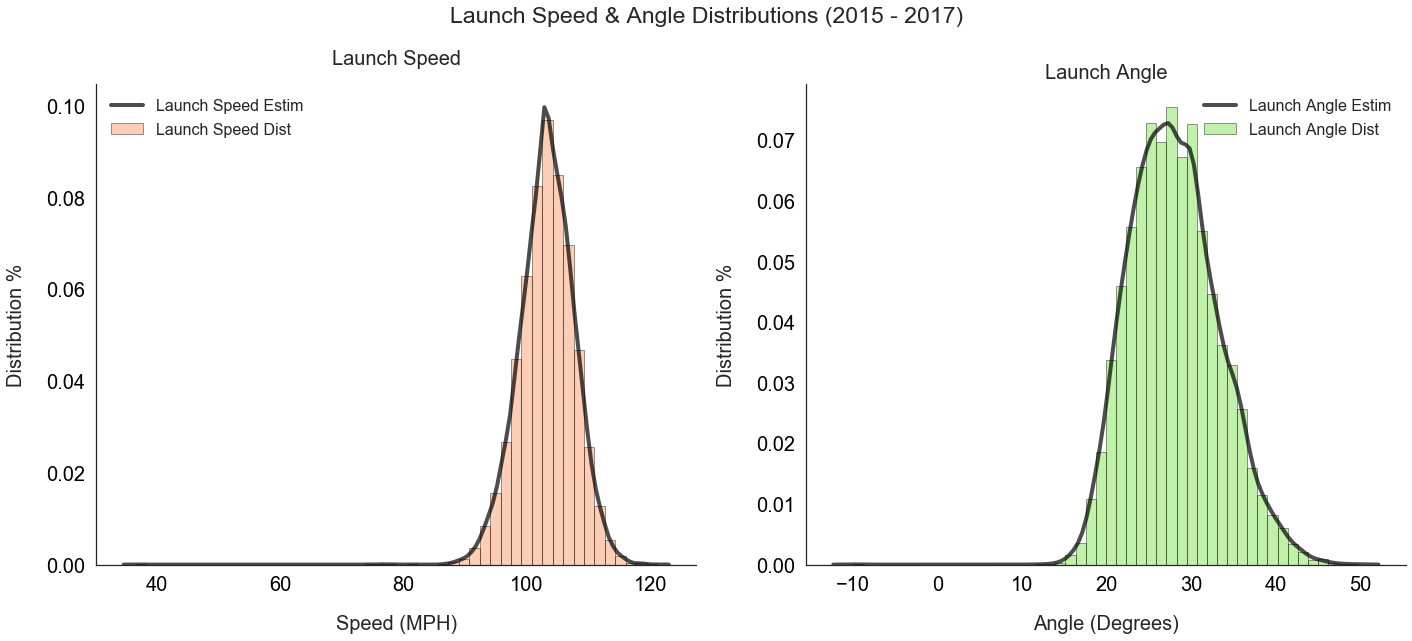

In [207]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,9))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

fig.suptitle('Launch Speed & Angle Distributions (2015 - 2017)', y=1)
a = sns.distplot(final_df['launch_speed'], 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim","alpha":.7},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 ax=axes[0], 
                 label='Launch Speed Dist')
b = sns.distplot(final_df['launch_angle'], 
                 color = '#61de2a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim","alpha":.7},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 ax=axes[1], 
                 label = 'Launch Angle Dist')

axes[0].set_xlabel('Speed (MPH)', fontsize=20, labelpad=20)
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('Launch Speed', fontsize=20, pad=20)
axes[1].set_xlabel('Angle (Degrees)', fontsize=20, labelpad=20)
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('Launch Angle', fontsize=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")

fig.tight_layout()
fig.subplots_adjust(top=0.88)

fig.savefig('../plots/subplots_angle_speed_all.png')

#### Review by Year

In [33]:
launch_speed17 = final_df[final_df['game_year'] == 2017][['launch_speed']]
launch_speed16 = final_df[final_df['game_year'] == 2016][['launch_speed']]
launch_speed15 = final_df[final_df['game_year'] == 2015][['launch_speed']]

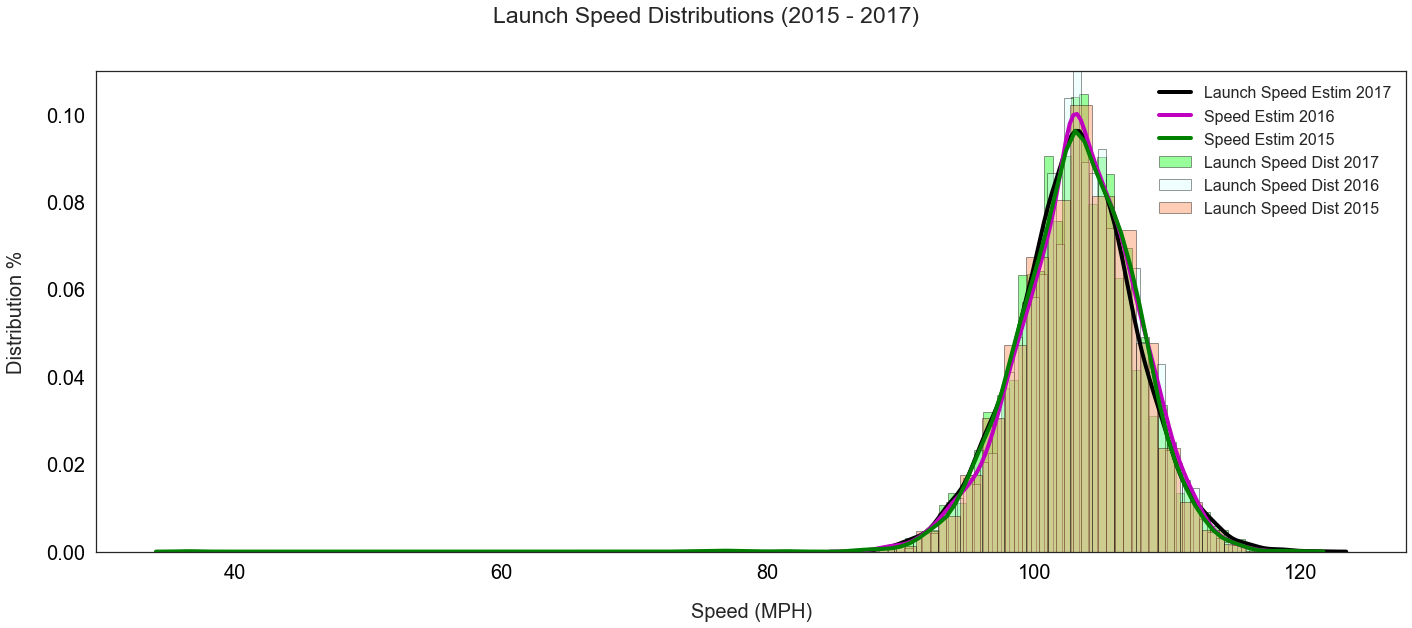

In [208]:
plt.figure(figsize=(20,9))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

plt.suptitle('Launch Speed Distributions (2015 - 2017)')
a = sns.distplot(launch_speed17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim 2017","alpha":1},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 label='Launch Speed Dist 2017')
b = sns.distplot(launch_speed16, 
                 color = '#d6fffa', 
                 kde_kws={"color":"m","lw":4,"label":"Speed Estim 2016","alpha":1},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 label = 'Launch Speed Dist 2016')
c = sns.distplot(launch_speed15, 
                 color = '#fc824a', 
                 kde_kws={"color":"g","lw":4,"label":"Speed Estim 2015","alpha":1},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 label = 'Launch Speed Dist 2015')


plt.xlabel('Speed (MPH)', fontsize=20, labelpad=20)
plt.ylabel('Distribution %', fontsize=20, labelpad=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")
c.tick_params(labelsize=20,labelcolor="k")


plt.tight_layout();
plt.subplots_adjust(top=0.88)

plt.savefig('../plots/dist_all_seasons.png')

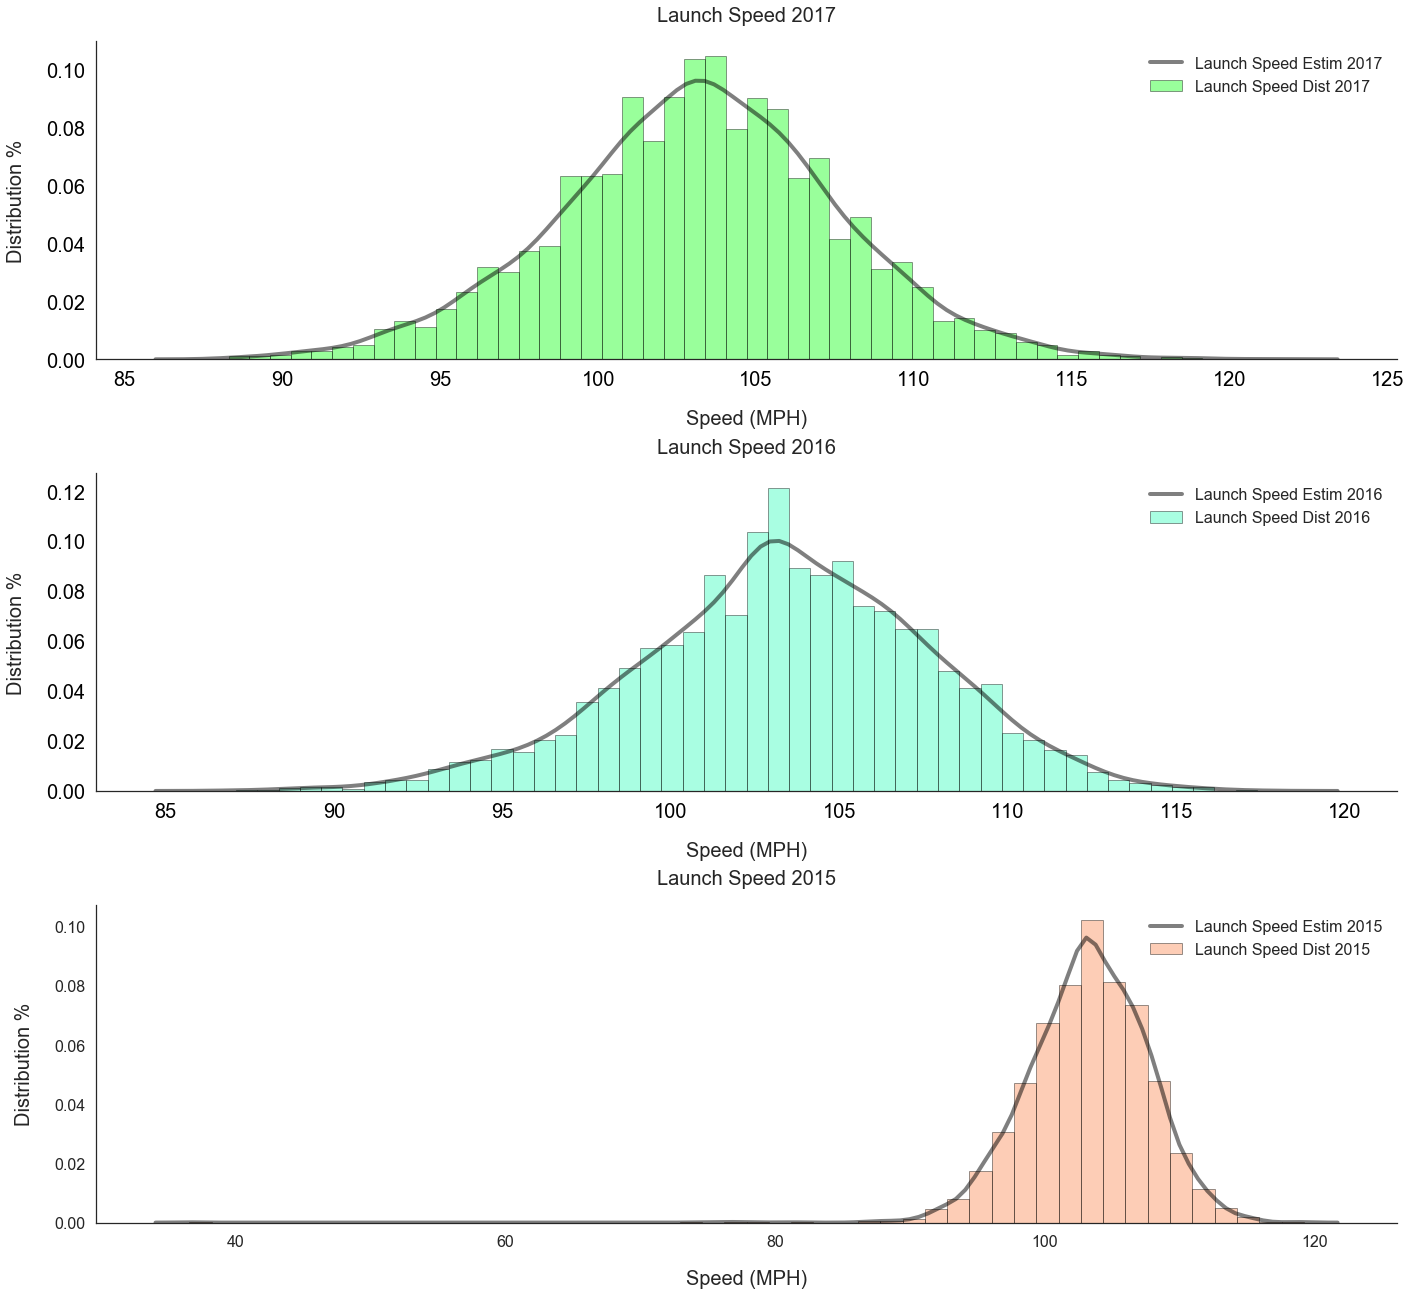

In [209]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(20,20))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.distplot(launch_speed17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim 2017","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[0],
                 label='Launch Speed Dist 2017')
b = sns.distplot(launch_speed16, 
                 color = '#2afeb7', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim 2016","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[1],
                 label = 'Launch Speed Dist 2016')
c = sns.distplot(launch_speed15, 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim 2015","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[2],
                 label = 'Launch Speed Dist 2015')

axes[0].set_xlabel('Speed (MPH)', fontsize=20, labelpad=20)
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('Launch Speed 2017', fontsize=20, pad=20)
axes[1].set_xlabel('Speed (MPH)', fontsize=20, labelpad=20)
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('Launch Speed 2016', fontsize=20, pad=20)
axes[2].set_xlabel('Speed (MPH)', fontsize=20, labelpad=20)
axes[2].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[2].set_title('Launch Speed 2015', fontsize=20, pad=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

fig.savefig('../plots/subplots_speed_by_year.png')

In [37]:
launch_angle17 = final_df[final_df['game_year'] == 2017][['launch_angle']]
launch_angle16 = final_df[final_df['game_year'] == 2016][['launch_angle']]
launch_angle15 = final_df[final_df['game_year'] == 2015][['launch_angle']]

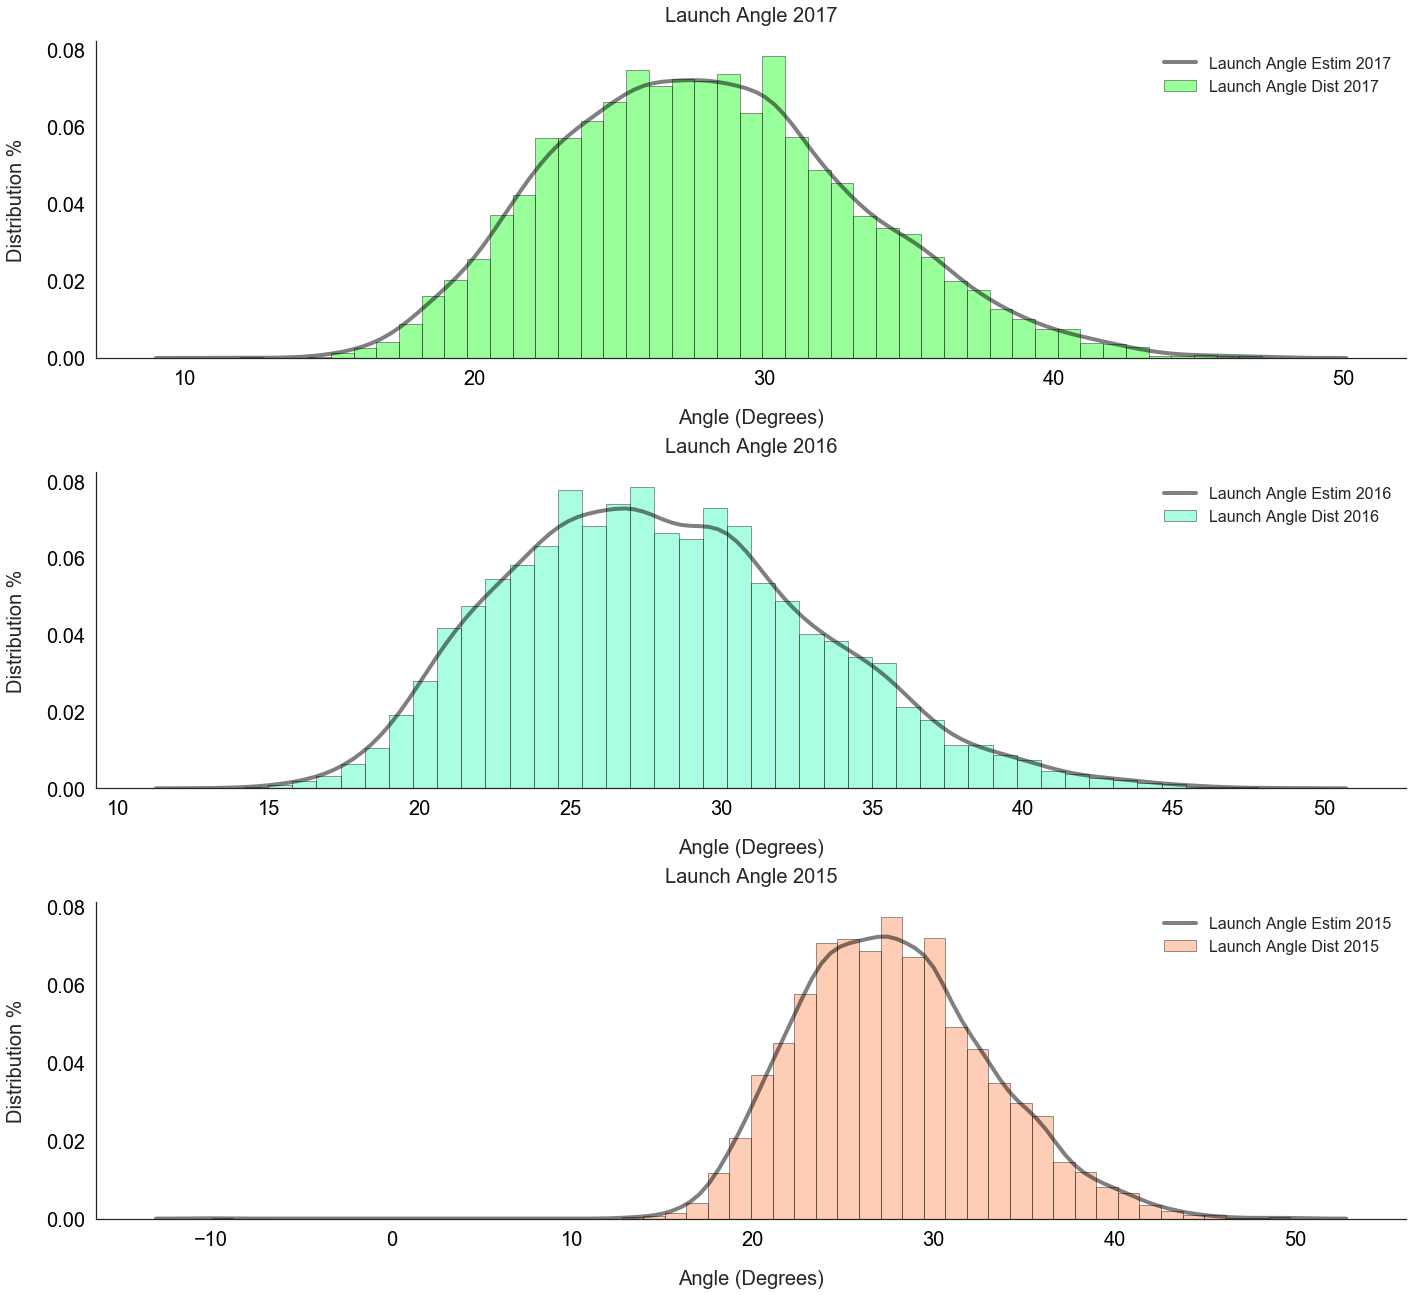

In [204]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(20,20))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.distplot(launch_angle17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim 2017","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[0],
                 label='Launch Angle Dist 2017')
b = sns.distplot(launch_angle16, 
                 color = '#2afeb7', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim 2016","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[1],
                 label = 'Launch Angle Dist 2016')
c = sns.distplot(launch_angle15, 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim 2015","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[2],
                 label = 'Launch Angle Dist 2015')

axes[0].set_xlabel('Angle (Degrees)', fontsize=20, labelpad=20)
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('Launch Angle 2017', fontsize=20, pad=20)
axes[1].set_xlabel('Angle (Degrees)', fontsize=20, labelpad=20)
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('Launch Angle 2016', fontsize=20, pad=20)
axes[2].set_xlabel('Angle (Degrees)', fontsize=20, labelpad=20)
axes[2].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[2].set_title('Launch Angle 2015', fontsize=20, pad=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")
c.tick_params(labelsize=20,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

fig.savefig('../plots/subplots_angle_by_year.png')

In [40]:
launch_avg_df = final_df.groupby('game_year').mean()[['launch_angle', 'launch_speed']]
launch_avg_df

,launch_angle,launch_speed
game_year,,
2015,27.844097,103.187495
2016,28.077976,103.359321
2017,28.077689,103.156672


In [41]:
corr_df_launch_speed = final_df.corr()['launch_speed'].sort_values(ascending=False).to_frame()

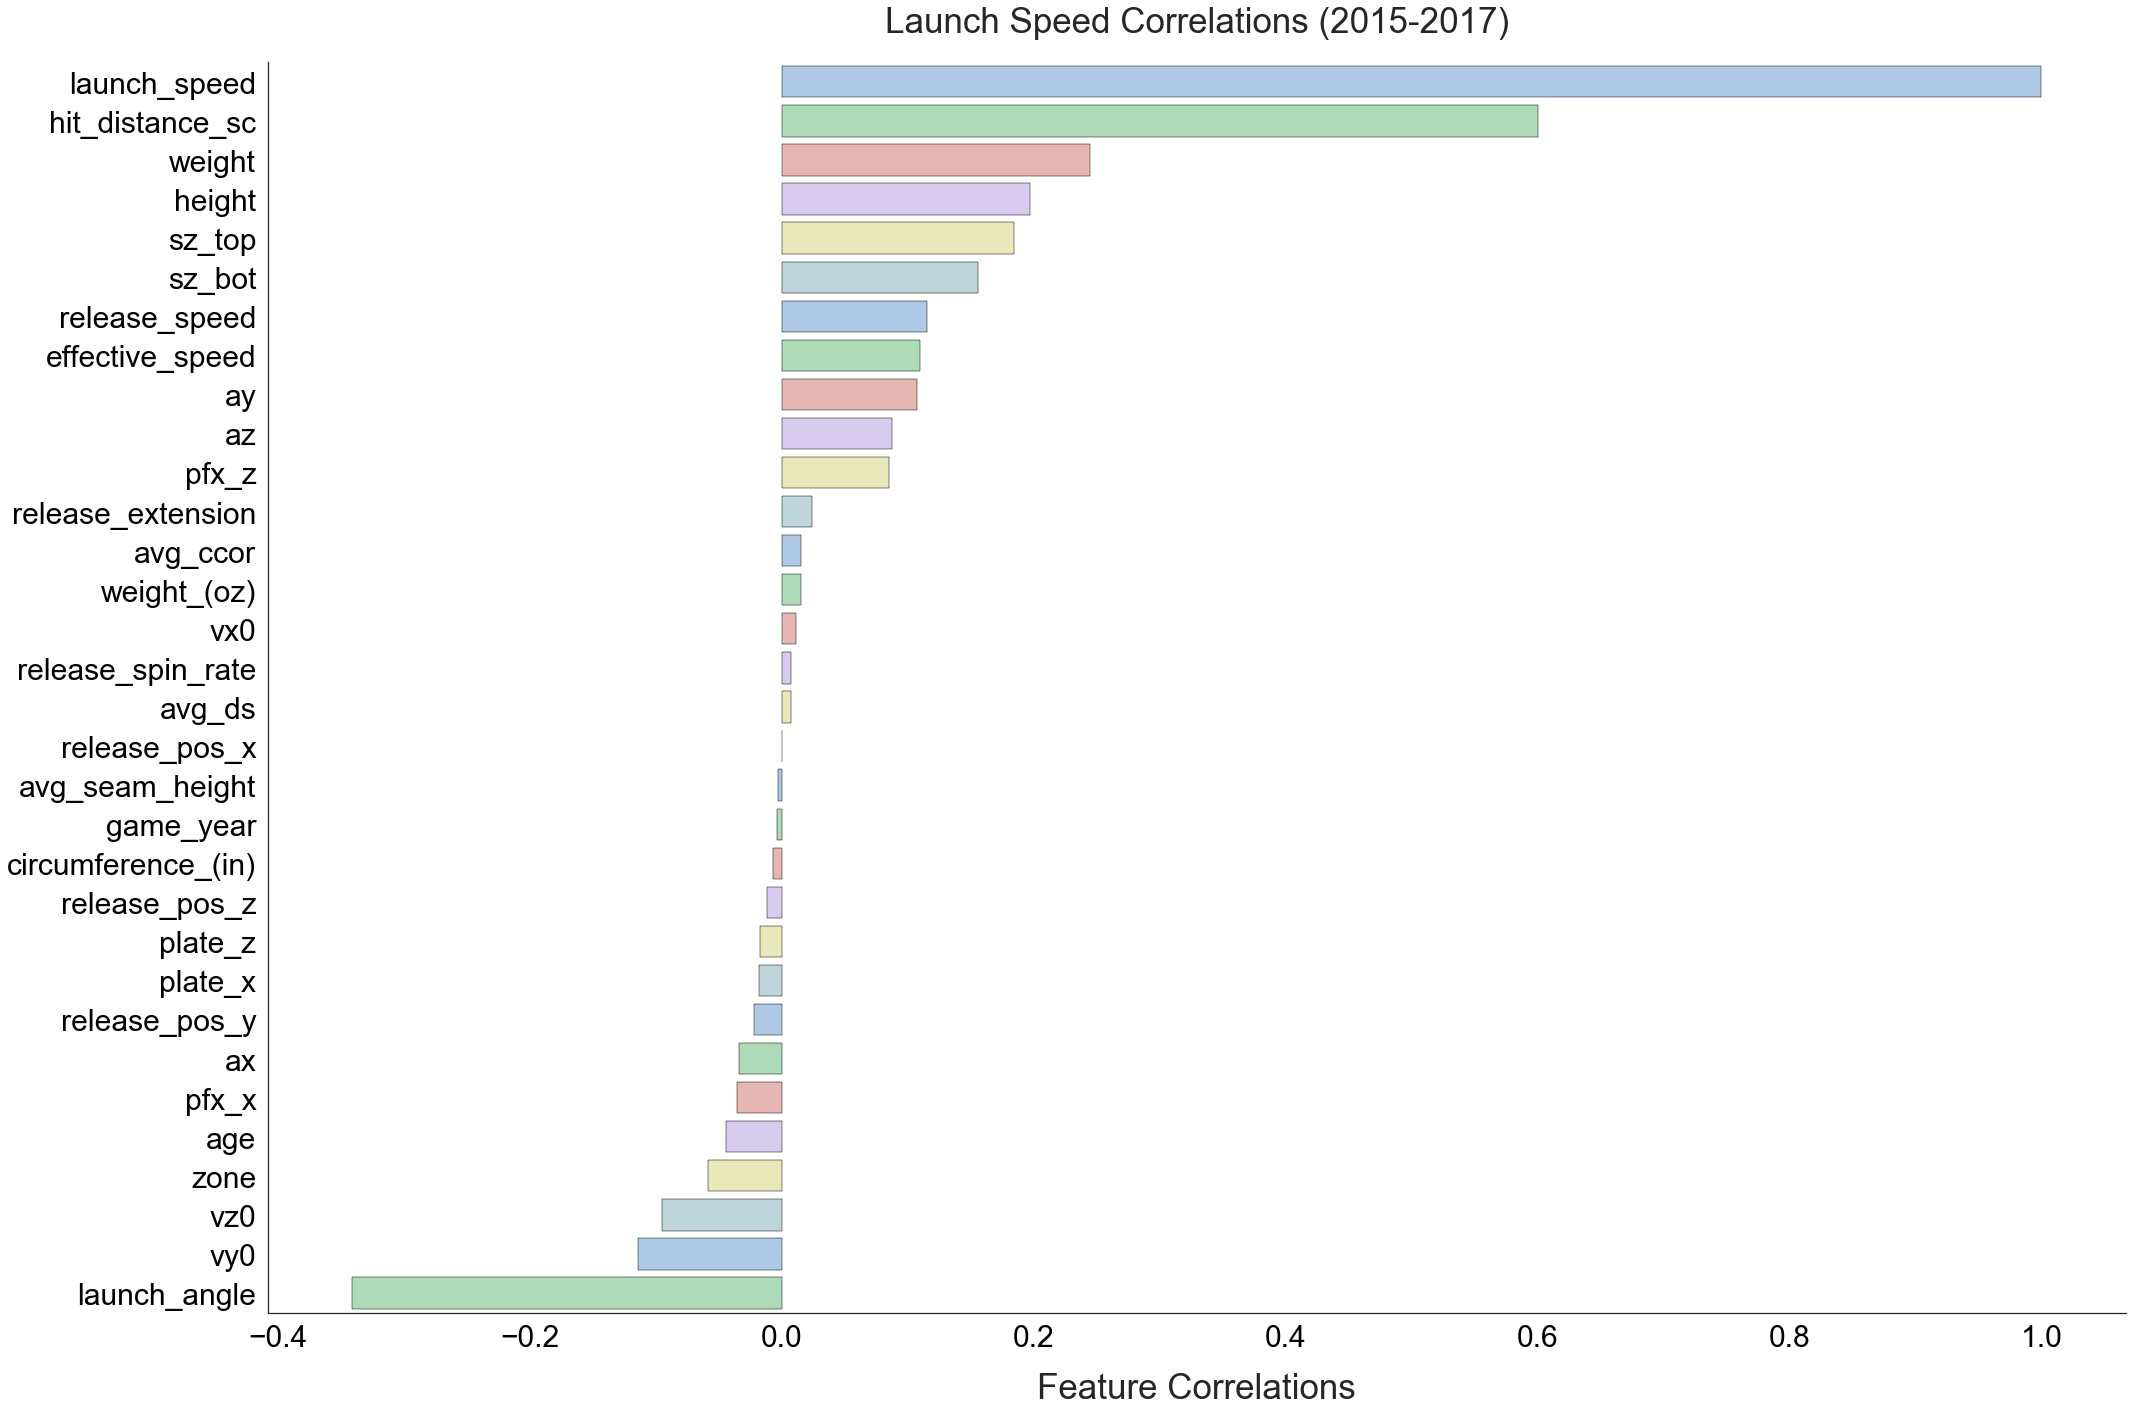

In [90]:
plt.figure(figsize=(30,20))

sns.set(style="white")
sns.set_context("poster")

plt.title('Launch Speed Correlations (2015-2017)', fontsize=35, pad=30)

a = sns.barplot(corr_df_launch_speed['launch_speed'],
                corr_df_launch_speed.index, 
                palette='pastel', saturation=.5, edgecolor='k')

plt.xlabel('Feature Correlations', fontsize=35, labelpad=20)

a.tick_params(labelsize=30, labelcolor="k")
sns.despine()

plt.tight_layout();

plt.savefig('../plots/launch_speed_correlations.png')

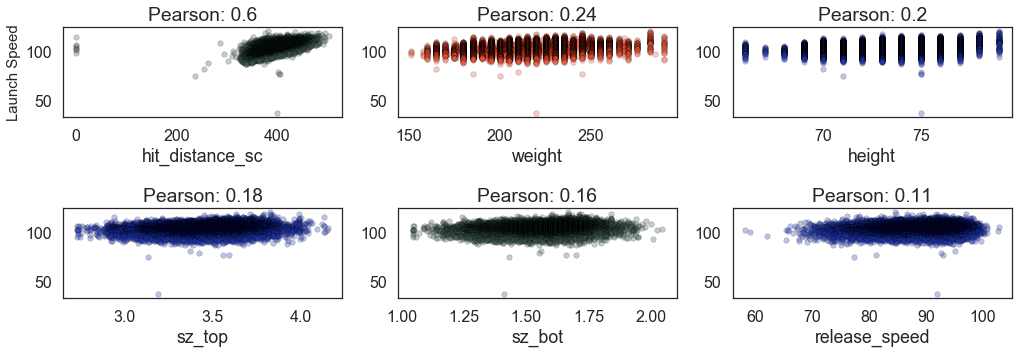

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17,5))
fig.subplots_adjust(hspace=1)

ax=ax.flatten()

cols = ['hit_distance_sc', 'weight', 'height','sz_top', 'sz_bot', 'release_speed']
colors=['#415952', '#f35134', '#243AB5', '#243AB5', '#415952', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Launch Speed', fontsize=15)
    i.scatter(final_df[cols[j]], final_df['launch_speed'],  alpha=0.3, color=colors[j], s=30, edgecolors='k')
    i.set_xlabel(cols[j])
    i.set_title(f'Pearson: {final_df.corr().loc[cols[j]]["launch_speed"].round(2)}')
    j+=1

In [92]:
final_df[final_df['launch_speed'] < 60]

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,zone,p_throws,bb_type,game_year,pfx_x,...,release_extension,release_pos_y,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds
21046,FF,91.9,-0.7695,6.4769,Bryce Harper,11.0,R,line_drive,2015,-0.795217,...,6.982,53.5191,75,220,25,5.120125,9.107917,0.040502,0.491333,12740.875


In [93]:
final_df2 = final_df.reset_index()

In [94]:
final_df2[final_df2['launch_speed'] < 60]

,index,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,zone,p_throws,bb_type,game_year,...,release_extension,release_pos_y,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds
16387,21046,FF,91.9,-0.7695,6.4769,Bryce Harper,11.0,R,line_drive,2015,...,6.982,53.5191,75,220,25,5.120125,9.107917,0.040502,0.491333,12740.875


In [95]:
final_df2.drop(final_df2.index[16387], inplace=True)

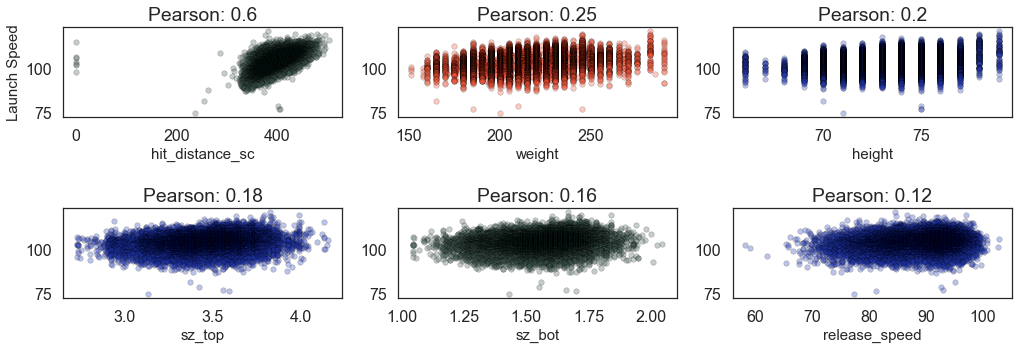

In [96]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))
fig.subplots_adjust(hspace=1)

ax=ax.flatten()

cols = ['hit_distance_sc', 'weight', 'height','sz_top', 'sz_bot', 'release_speed']
colors=['#415952', '#f35134', '#243AB5', '#243AB5', '#415952', '#243AB5', '#243AB5']

j=0
for i in ax:
    #print(i)
    if j==0:
        i.set_ylabel('Launch Speed', fontsize=15)
    i.scatter(final_df2[cols[j]], final_df2['launch_speed'],  alpha=0.3, s=30, color=colors[j], edgecolors='k')
    i.set_xlabel(cols[j], fontsize=15)
    i.set_title('Pearson: %s'%final_df2.corr().loc[cols[j]]['launch_speed'].round(2))
    j+=1

In [97]:
mask = final_df2[final_df2['hit_distance_sc'] < 200]
mask.index.values

array([   67,  4326,  5007,  7937,  9583, 10797, 14510])

In [98]:
final_df3 = final_df2.drop(mask.index.values)

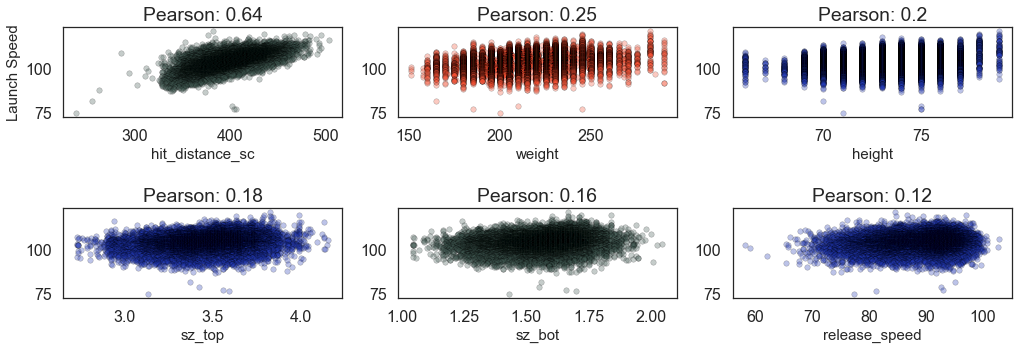

In [99]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17,5))
fig.subplots_adjust(hspace=1)

ax=ax.flatten()

cols = ['hit_distance_sc', 'weight', 'height','sz_top', 'sz_bot', 'release_speed']
colors=['#415952', '#f35134', '#243AB5', '#243AB5', '#415952', '#243AB5', '#243AB5']

j=0
for i in ax:
    if j==0:
        i.set_ylabel('Launch Speed', fontsize=15)
    i.scatter(final_df3[cols[j]], final_df3['launch_speed'], s=30, alpha=0.3, color=colors[j], edgecolors='k')
    i.set_xlabel(cols[j], fontsize=15)
    i.set_title('Pearson: %s'%final_df3.corr().loc[cols[j]]['launch_speed'].round(2))
    j+=1

In [100]:
pitch_launch_speed = final_df.groupby(['pitch_type', 'game_year']).mean()[['launch_speed']]
pitch_launch_speed.reset_index(inplace=True)

In [101]:
pitch_17 = pitch_launch_speed[pitch_launch_speed['game_year'] == 2017].sort_values('pitch_type', ascending=False)
pitch_16 = pitch_launch_speed[pitch_launch_speed['game_year'] == 2016].sort_values('pitch_type', ascending=False)
pitch_15 = pitch_launch_speed[pitch_launch_speed['game_year'] == 2015].sort_values('pitch_type', ascending=False)

In [102]:
pitch_17.head()

,pitch_type,game_year,launch_speed
35,SL,2017,102.581962
32,SI,2017,103.537093
29,SC,2017,107.200000
28,KN,2017,101.942105
25,KC,2017,102.437363


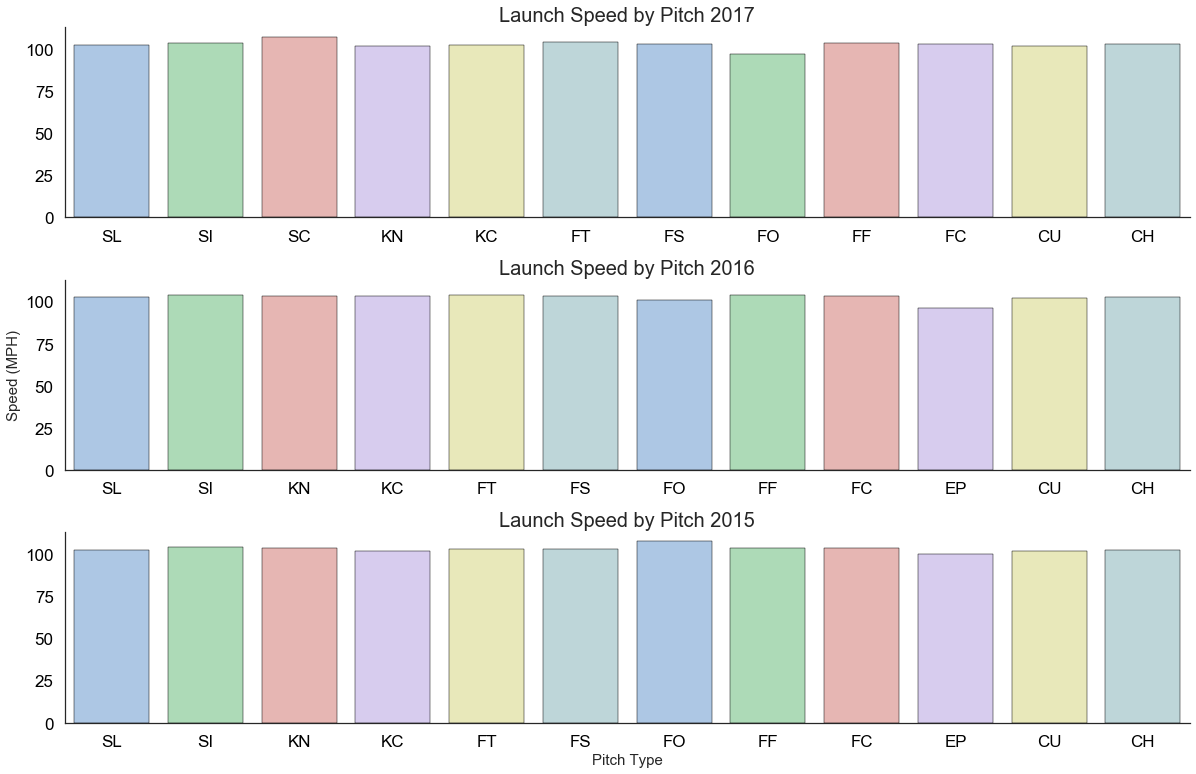

In [103]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharey=True, figsize=(17,12))

sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.barplot(pitch_17['pitch_type'], 
                pitch_17['launch_speed'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[0],
                label='Launch Speeds 2017')

b = sns.barplot(pitch_16['pitch_type'], 
                pitch_16['launch_speed'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[1],
                label='Launch Speeds 2016')

c = sns.barplot(pitch_15['pitch_type'], 
                pitch_15['launch_speed'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[2],
                label='Launch Speeds 2015')

axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_title('Launch Speed by Pitch 2017', fontsize=20)
axes[1].set_ylabel('Speed (MPH)', fontsize=15)
axes[1].set_xlabel('')
axes[1].set_title('Launch Speed by Pitch 2016', fontsize=20)
axes[2].set_ylabel('')
axes[2].set_xlabel('Pitch Type', fontsize=15)
axes[2].set_title('Launch Speed by Pitch 2015', fontsize=20)

a.tick_params(labelsize=17,labelcolor="k")
b.tick_params(labelsize=17,labelcolor="k")
c.tick_params(labelsize=17,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

In [133]:
bb_type_year = final_df.groupby(['game_year', 'bb_type']).count()['pitch_type'].to_frame().reset_index()
bb_type_year

,game_year,bb_type,pitch_type
0,2015,fly_ball,2691
1,2015,line_drive,2123
2,2016,fly_ball,3692
3,2016,line_drive,1849
4,2017,fly_ball,5010
5,2017,line_drive,1023


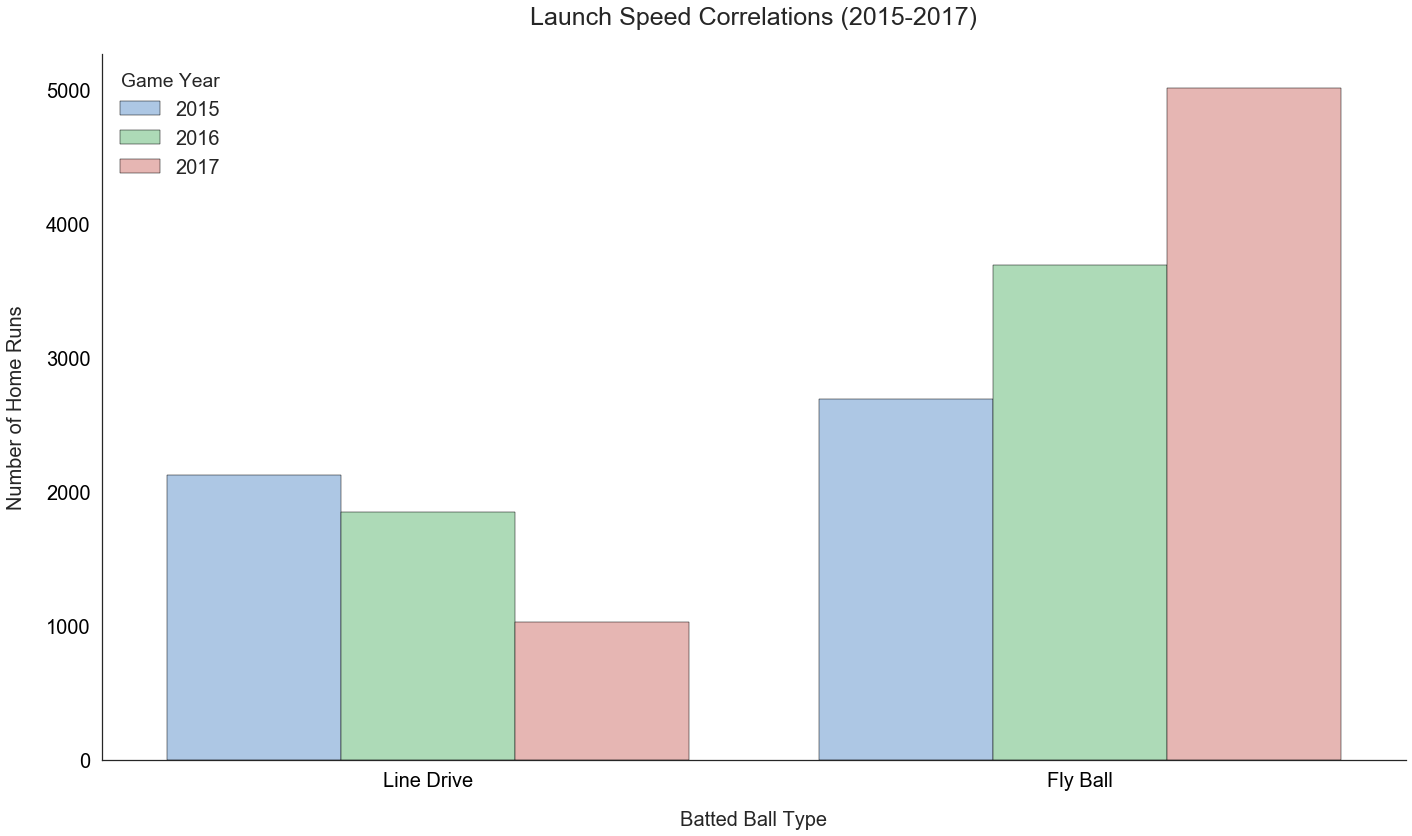

In [200]:
plt.figure(figsize=(20,12))

sns.set(style="white")
sns.set_context("poster")

plt.title('Launch Speed Correlations (2015-2017)', fontsize=25, pad=30)

a = sns.barplot(bb_type_year['bb_type'].replace({'line_drive':'Line Drive', 'fly_ball':'Fly Ball'}), 
                bb_type_year['pitch_type'], 
                hue=bb_type_year['game_year'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                order=['Line Drive', 'Fly Ball']
               )

plt.xlabel('Batted Ball Type', fontsize=20, labelpad=20)
plt.ylabel('Number of Home Runs', fontsize=20, labelpad=20)
plt.legend(title="Game Year", fontsize=20)


a.tick_params(labelsize=20, labelcolor="k")

sns.despine()

plt.tight_layout();

In [105]:
pitch_type_counts = final_df['pitch_type'].value_counts().to_frame()
pitch_type_counts.reset_index(inplace=True)

In [106]:
pitch_type_counts

,index,pitch_type
0,FF,6508
1,SL,2366
2,FT,2119
3,CH,1810
4,SI,1156
5,CU,1013
6,FC,859
7,FS,268
8,KC,208
9,KN,70


In [72]:
pitch_type_counts.columns = ['pitch_type', 'pitch_counts']
pitch_type_counts.set_index('pitch_type', inplace=True)

In [73]:
pitch_type_counts

,pitch_counts
pitch_type,
FF,6508
SL,2366
FT,2119
CH,1810
SI,1156
CU,1013
FC,859
FS,268
KC,208


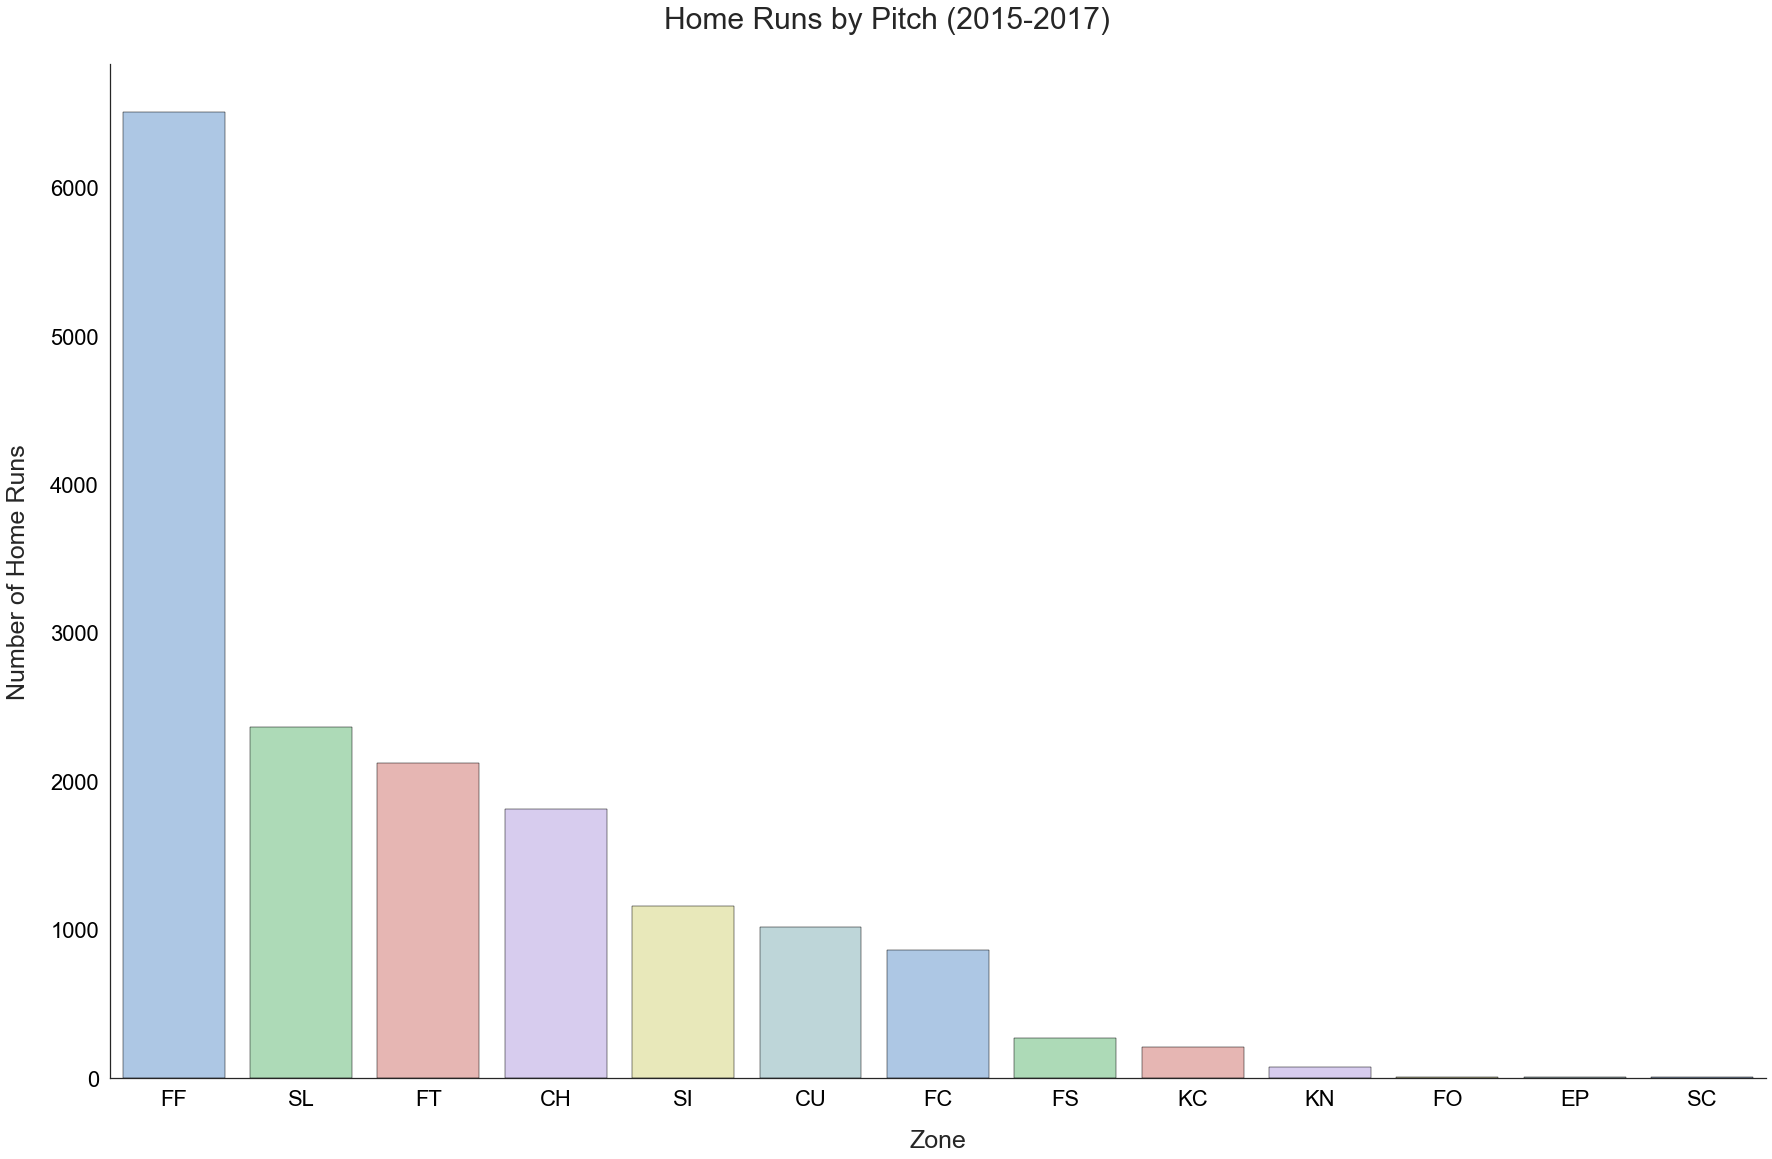

In [74]:
plt.figure(figsize=(25,8))

sns.set(style="white")
sns.set_context("poster")

plt.suptitle('Home Runs by Pitch (2015-2017)', fontsize=30)

a = sns.barplot(pitch_type_counts.index,
                pitch_type_counts['pitch_counts'], 
                palette='pastel', saturation=.5, edgecolor='k')

plt.xlabel('Zone', fontsize=25, labelpad=20)
plt.ylabel('Number of Home Runs', fontsize = 25, labelpad=20)

a.tick_params(labelsize=22,labelcolor="k")
sns.despine()

plt.tight_layout();
plt.subplots_adjust(top=0.88, bottom=-0.88)

#plt.savefig('../plots/launch_speed_correlations.png')

In [75]:
pitch_type_counts17 = final_df[final_df['game_year'] == 2017][['pitch_type']]
pitch_type_counts17 = pitch_type_counts17['pitch_type'].value_counts().to_frame()

In [76]:
pitch_type_counts16 = final_df[final_df['game_year'] == 2016][['pitch_type']]
pitch_type_counts16 = pitch_type_counts16['pitch_type'].value_counts().to_frame()

In [77]:
pitch_type_counts15 = final_df[final_df['game_year'] == 2015][['pitch_type']]
pitch_type_counts15 = pitch_type_counts15['pitch_type'].value_counts().to_frame()

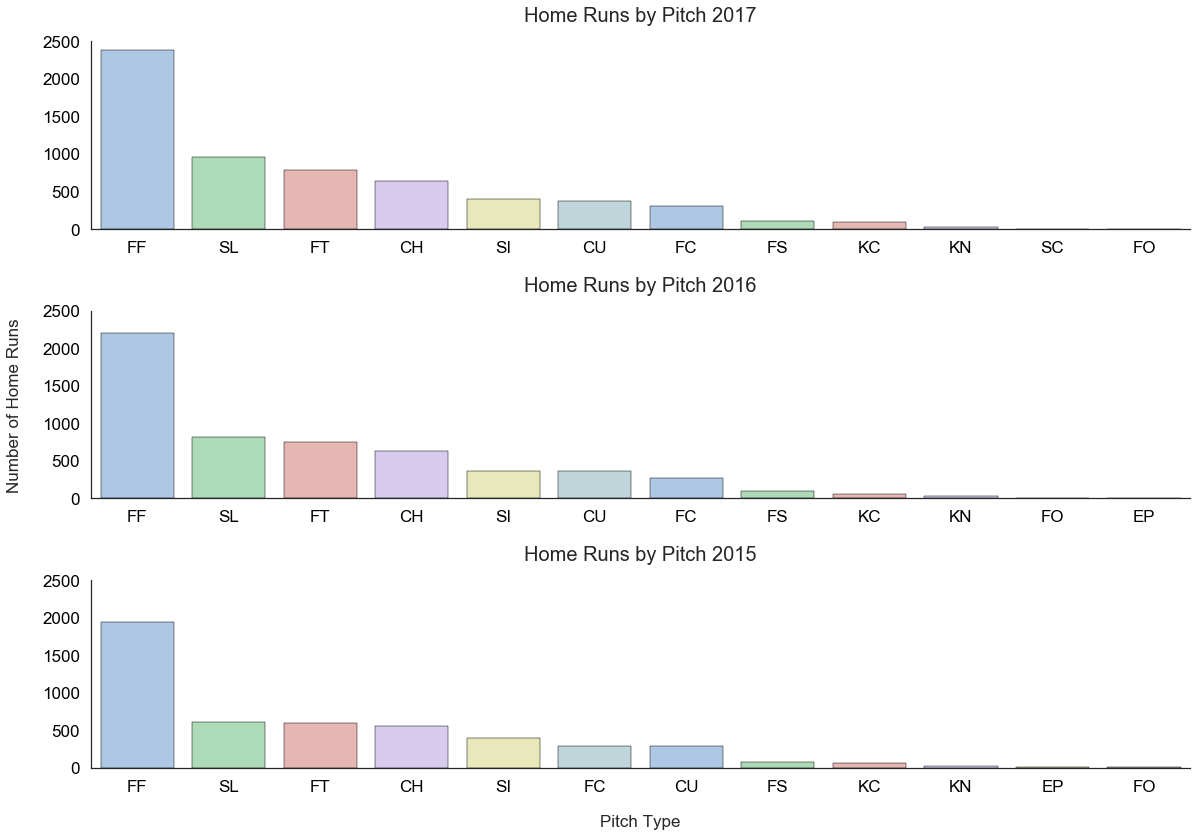

In [184]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharey=True, figsize=(17,12))

sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.barplot(pitch_type_counts17.index, 
                pitch_type_counts17['pitch_type'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[0],
                label='Launch Speeds 2017')

b = sns.barplot(pitch_type_counts16.index, 
                pitch_type_counts16['pitch_type'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[1],
                label='Launch Speeds 2016')

c = sns.barplot(pitch_type_counts15.index, 
                pitch_type_counts15['pitch_type'],
                palette='pastel', 
                saturation=.5, 
                edgecolor='k',
                ax=axes[2],
                label='Launch Speeds 2015')

axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_title('Home Runs by Pitch 2017', fontsize=20, pad=20)
axes[1].set_ylabel('Number of Home Runs', fontsize=17, labelpad=20)
axes[1].set_xlabel('')
axes[1].set_title('Home Runs by Pitch 2016', fontsize=20, pad=20)
axes[2].set_ylabel('')
axes[2].set_xlabel('Pitch Type', fontsize=17, labelpad=20)
axes[2].set_title('Home Runs by Pitch 2015', fontsize=20, pad=20)

a.tick_params(labelsize=17,labelcolor="k")
b.tick_params(labelsize=17,labelcolor="k")
c.tick_params(labelsize=17,labelcolor="k")

fig.tight_layout();


In [79]:
zone_counts = final_df['zone'].value_counts().to_frame()
zone_counts.reset_index(inplace=True)

In [80]:
zone_counts.columns = ['zones', 'zone_counts']

In [81]:
zone_counts.set_index('zones', inplace=True)

In [82]:
zone_counts

,zone_counts
zones,
5.0,3700
4.0,2351
8.0,1980
6.0,1697
2.0,1516
7.0,1226
9.0,872
1.0,857
3.0,726


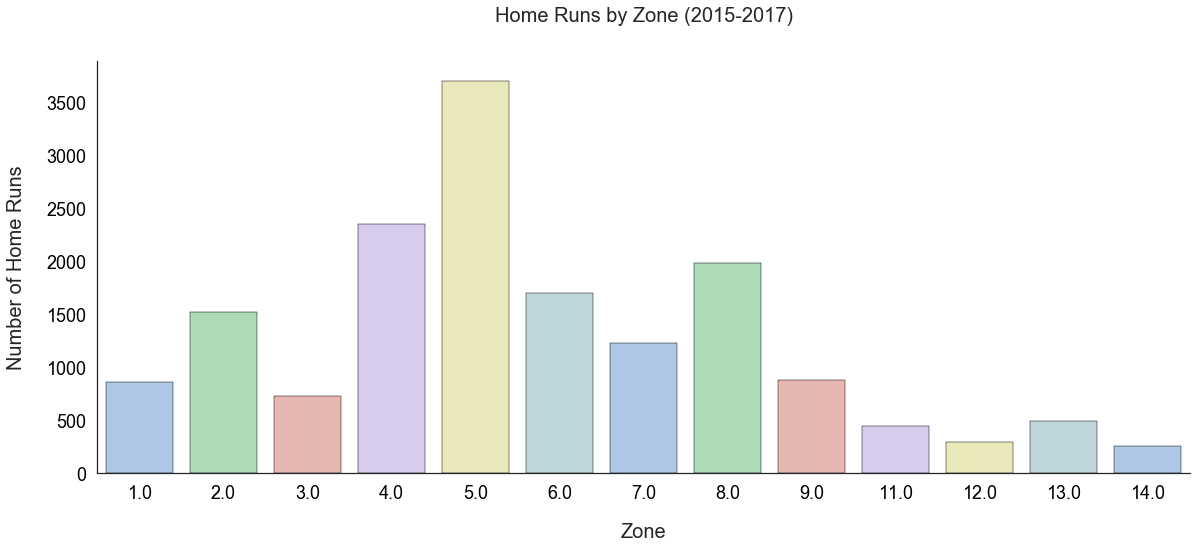

In [170]:
plt.figure(figsize=(17,8))

sns.set(style="white")
sns.set_context("poster")

plt.title('Home Runs by Zone (2015-2017)', fontsize=20, pad=40)

a = sns.barplot(zone_counts.index,
                zone_counts['zone_counts'], 
                palette='pastel', saturation=.5, edgecolor='k')

plt.xlabel('Zone', fontsize=20, labelpad=20)
plt.ylabel('Number of Home Runs', fontsize = 20, labelpad=20)

a.tick_params(labelsize=18,labelcolor="k")
sns.despine()

plt.tight_layout();

#plt.savefig('../plots/launch_speed_correlations.png')

In [ ]:
final_df

- Age Launch Speed
- Height Launch Speed
- Weight Launch Speed
- Age number of HR

- Baseballs:
    - Launch Speed
    - Launch Angle

In [128]:
pitch_type             Done
release_speed          Done
release_pos_x         float64
release_pos_z         float64
player_name            TO DO
zone                   TO DO
p_throws               TO DO
bb_type                TO DO
game_year               DONE
pfx_x                  TO DO
pfx_z                  TO DO
plate_x                TO DO
plate_z               TO DO
vx0                   TO DO
vy0                   TO DO
vz0                   TO DO
ax                    TO DO
ay                    TO DO
az                    TO DO
sz_top                Done
sz_bot                Done
hit_distance_sc       Done
launch_speed          ALL
launch_angle          TO DO
effective_speed       TO DO
release_spin_rate     TO DO
release_extension     TO DO
release_pos_y         TO DO
height                  TO DO
weight                  TO DO
age                     TO DO
weight_(oz)           TO DO
circumference_(in)    TO DO
avg_seam_height       TO DO
avg_ccor              TO DO
avg_ds                TO DO

SyntaxError: invalid syntax (<ipython-input-128-4ce20a1001b7>, line 1)

In [ ]:
Scatter plot of launch angles vs launch speeds:
    -2017
    -2016
    -2015

In [ ]:
g = sns.PairGrid(sub_col_df)
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()